In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
plt.style.use("seaborn-v0_8")

In [2]:
#helper functions
def return_frame(path):
    return pd.DataFrame(pd.read_pickle(path))

def exponential_moving_average(input_list, alpha=0.3):
    ema = [input_list[0]]
    for value in input_list[1:]:
        ema.append(alpha * value + (1 - alpha) * ema[-1])
    return ema

def plot_validation_results(df, alpha=0.3):
    metrics = ["val_loss", "val_prec", "val_rec", "val_auc"]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        
        ax.plot(df[metric], label=f"Original {metric}", marker='o', linestyle='--', color = "darkgrey")
        ema = exponential_moving_average(df[metric].tolist(), alpha)
        ax.plot(ema, label=f"Exponential moving average of {metric} (alpha: {alpha})", marker='o', linestyle='-', color = "darkblue")
        
        ax.set_xlabel("Epoch")
        ax.set_ylabel(metric)
        ax.set_title(f"{metric} vs. Epoch")
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
def evaluation(history):
    metrics = ["val_loss", "val_prec", "val_rec", "val_auc"]
    for metric in metrics:
        print("Observed metric:",metric,format(history[metric][0],'.3f'),"------>", format(history[metric].to_list()[-1],'.3f'))
        
def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate("{:.3f}".format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha="center", va="bottom")

In [3]:
#read histories
DATA_PATH = pathlib.Path(os.getcwd())/ "Model Histories"

cnn_model_history = return_frame(DATA_PATH / "cnn_model_history.pkl")
resnet_model_history = return_frame(DATA_PATH / "transfer_learning_historyResNet.pkl")
mobilenet_model_history = return_frame(DATA_PATH / "transfer_learning_history.pkl")
vgg_model_history = return_frame(DATA_PATH / "transfer_learning_historyVGG16.pkl")

#read test_results
cnn_model_test_results = pd.read_pickle(DATA_PATH / "cnn_test_results.pkl")
resnet_model_test_results = pd.read_pickle(DATA_PATH / "transfer_learning_test_resultsResNet.pkl")
mobilenet_model_test_results = pd.read_pickle(DATA_PATH / "transfer_learning_test_results.pkl")
vgg_model_test_results = pd.read_pickle(DATA_PATH / "transfer_learning_test_resultsVGG16.pkl")


# create a df to show the test results
test_results_df = pd.DataFrame([mobilenet_model_test_results,cnn_model_test_results,vgg_model_test_results,resnet_model_test_results],
            columns = ["test_loss", "test_precision","test_recall","test_auc"],index = ["MobileNet","CNN","VGG","ResNet"])
total_parameters = [2270805,630677,14719829,23608213]
total_computation = [21583104,187810560,723094272,370667520]
test_results_df["total_parameters"] = total_parameters
test_results_df["total_multadds"] = total_computation


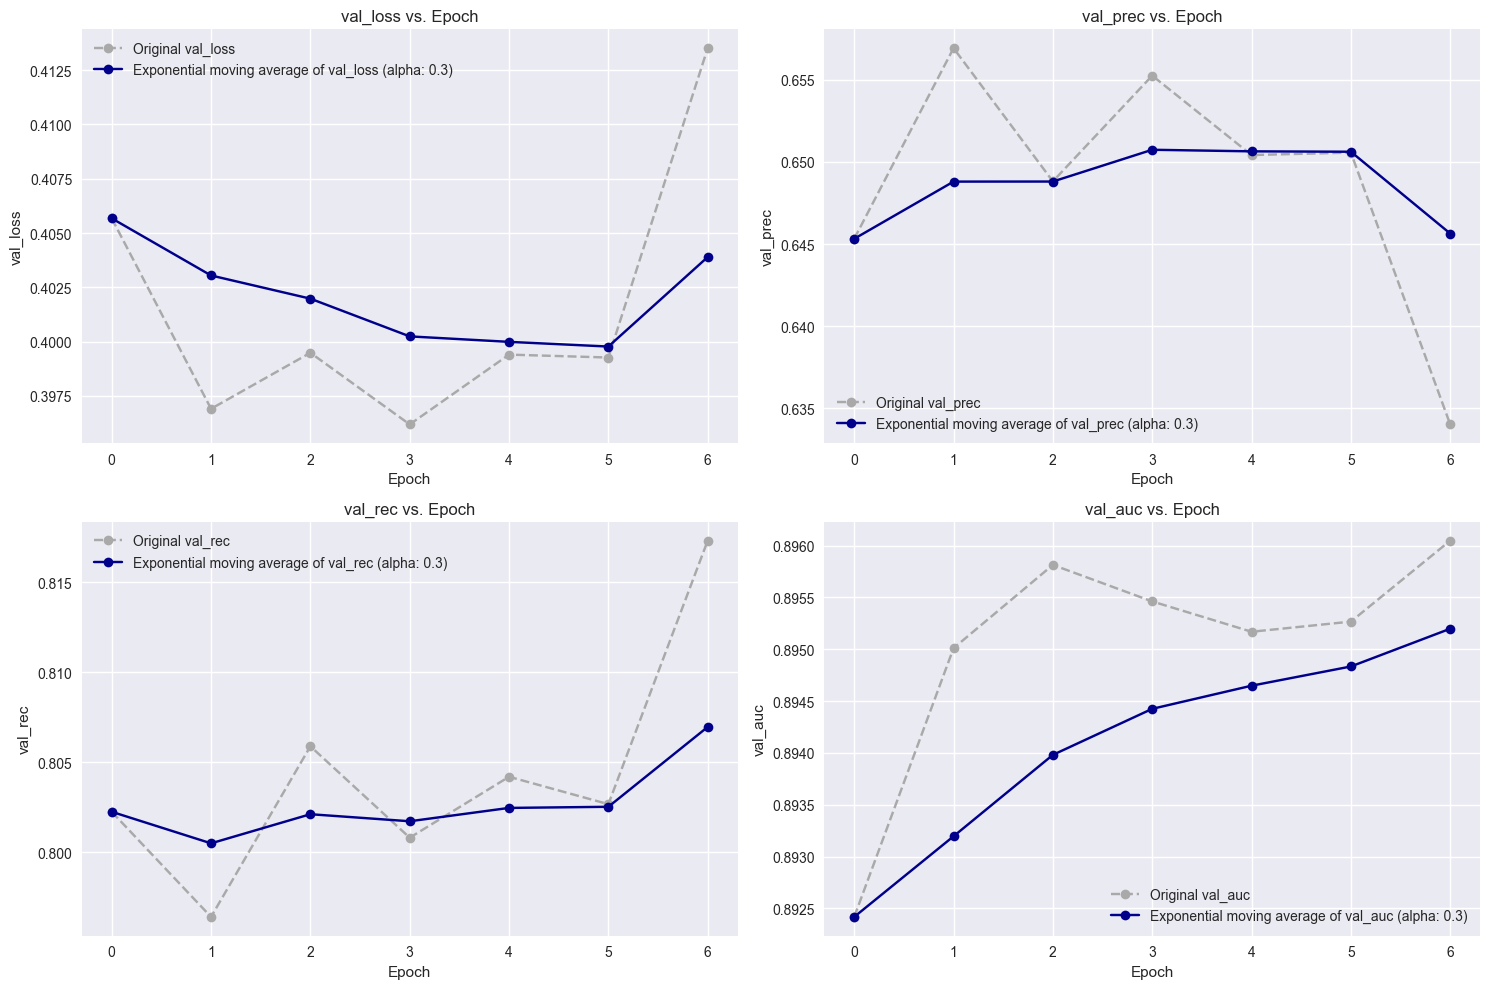

In [4]:
plot_validation_results(mobilenet_model_history)

In [5]:
evaluation(mobilenet_model_history)

Observed metric: val_loss 0.406 ------> 0.414
Observed metric: val_prec 0.645 ------> 0.634
Observed metric: val_rec 0.802 ------> 0.817
Observed metric: val_auc 0.892 ------> 0.896


------------------

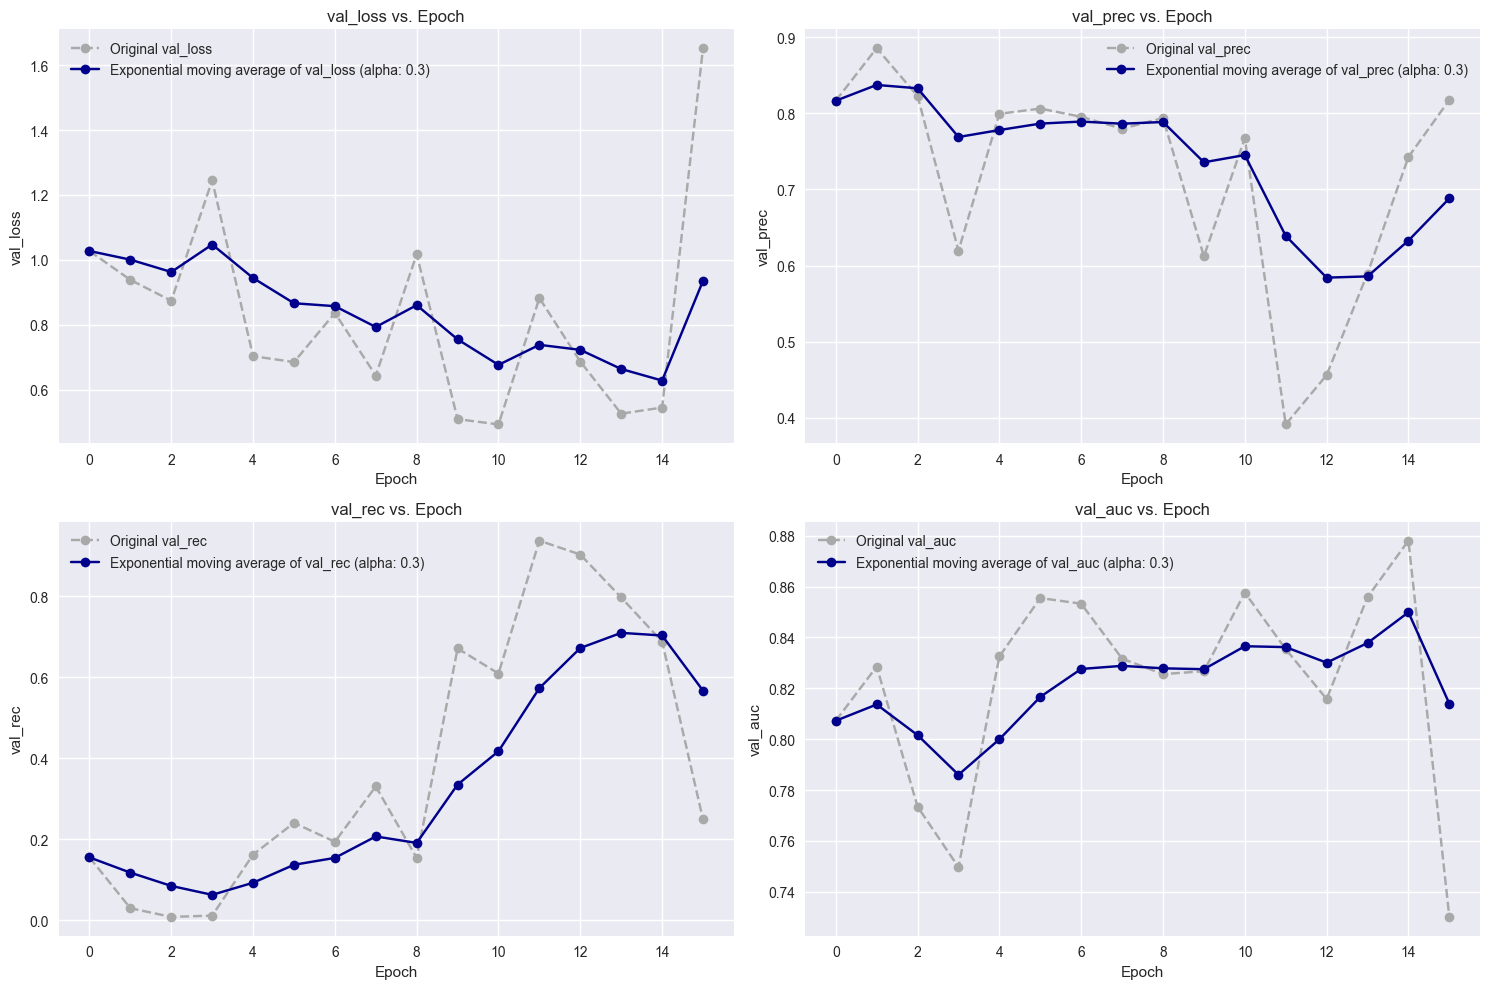

In [6]:
plot_validation_results(cnn_model_history)

In [7]:
evaluation(cnn_model_history)

Observed metric: val_loss 1.027 ------> 1.652
Observed metric: val_prec 0.817 ------> 0.818
Observed metric: val_rec 0.156 ------> 0.249
Observed metric: val_auc 0.807 ------> 0.730


------------------

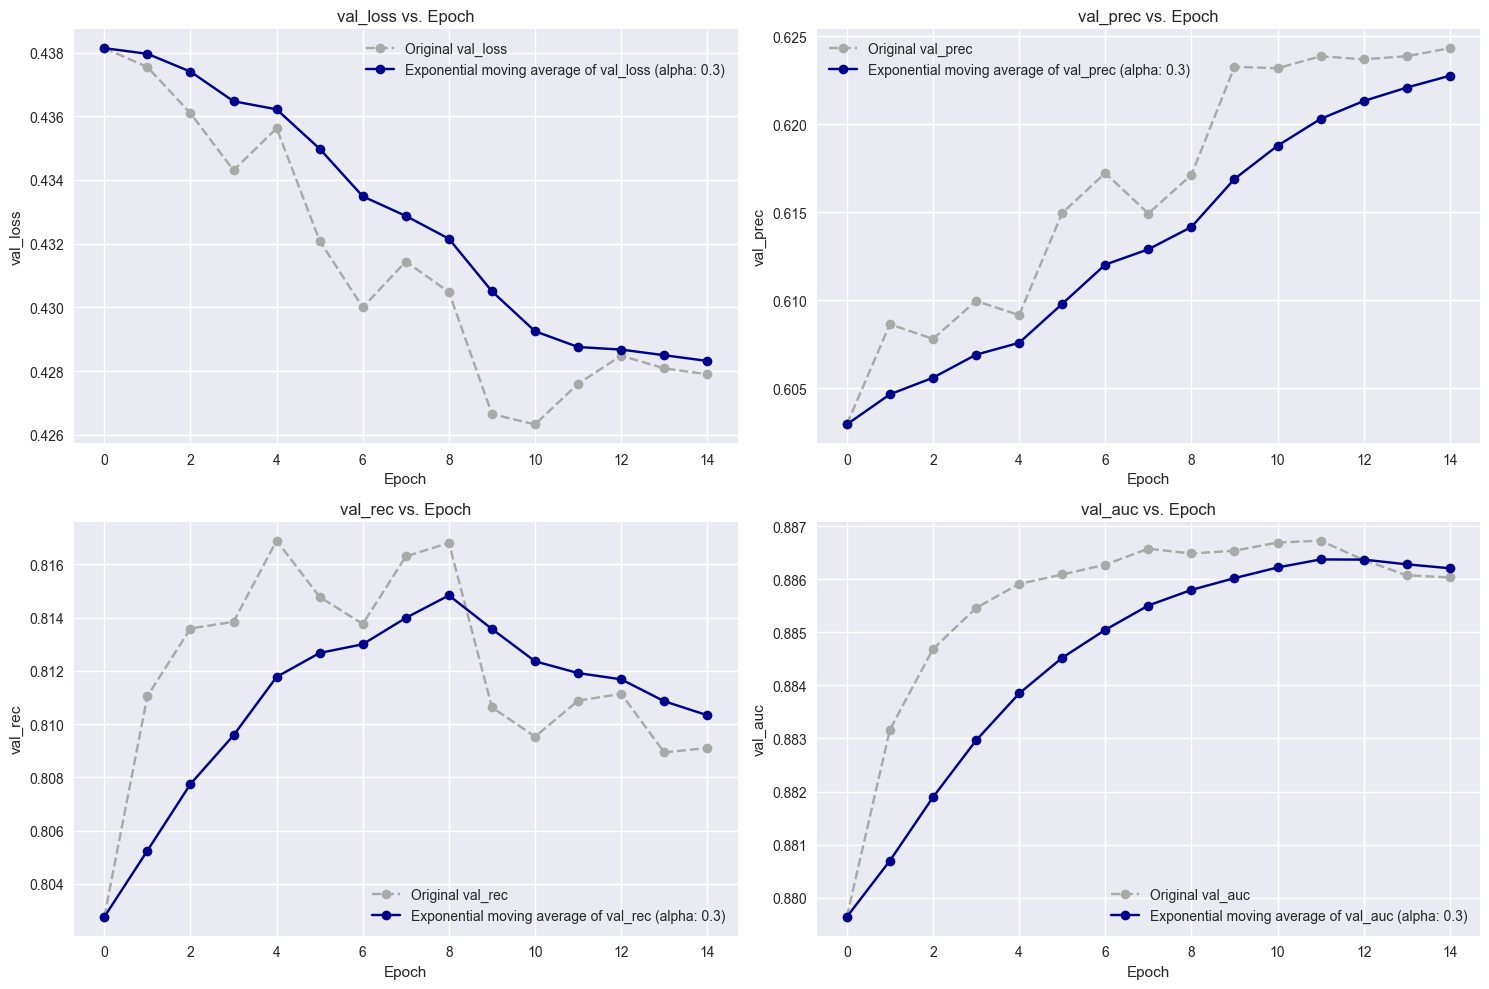

In [8]:
plot_validation_results(vgg_model_history)

In [9]:
evaluation(vgg_model_history)

Observed metric: val_loss 0.438 ------> 0.428
Observed metric: val_prec 0.603 ------> 0.624
Observed metric: val_rec 0.803 ------> 0.809
Observed metric: val_auc 0.880 ------> 0.886


------------------

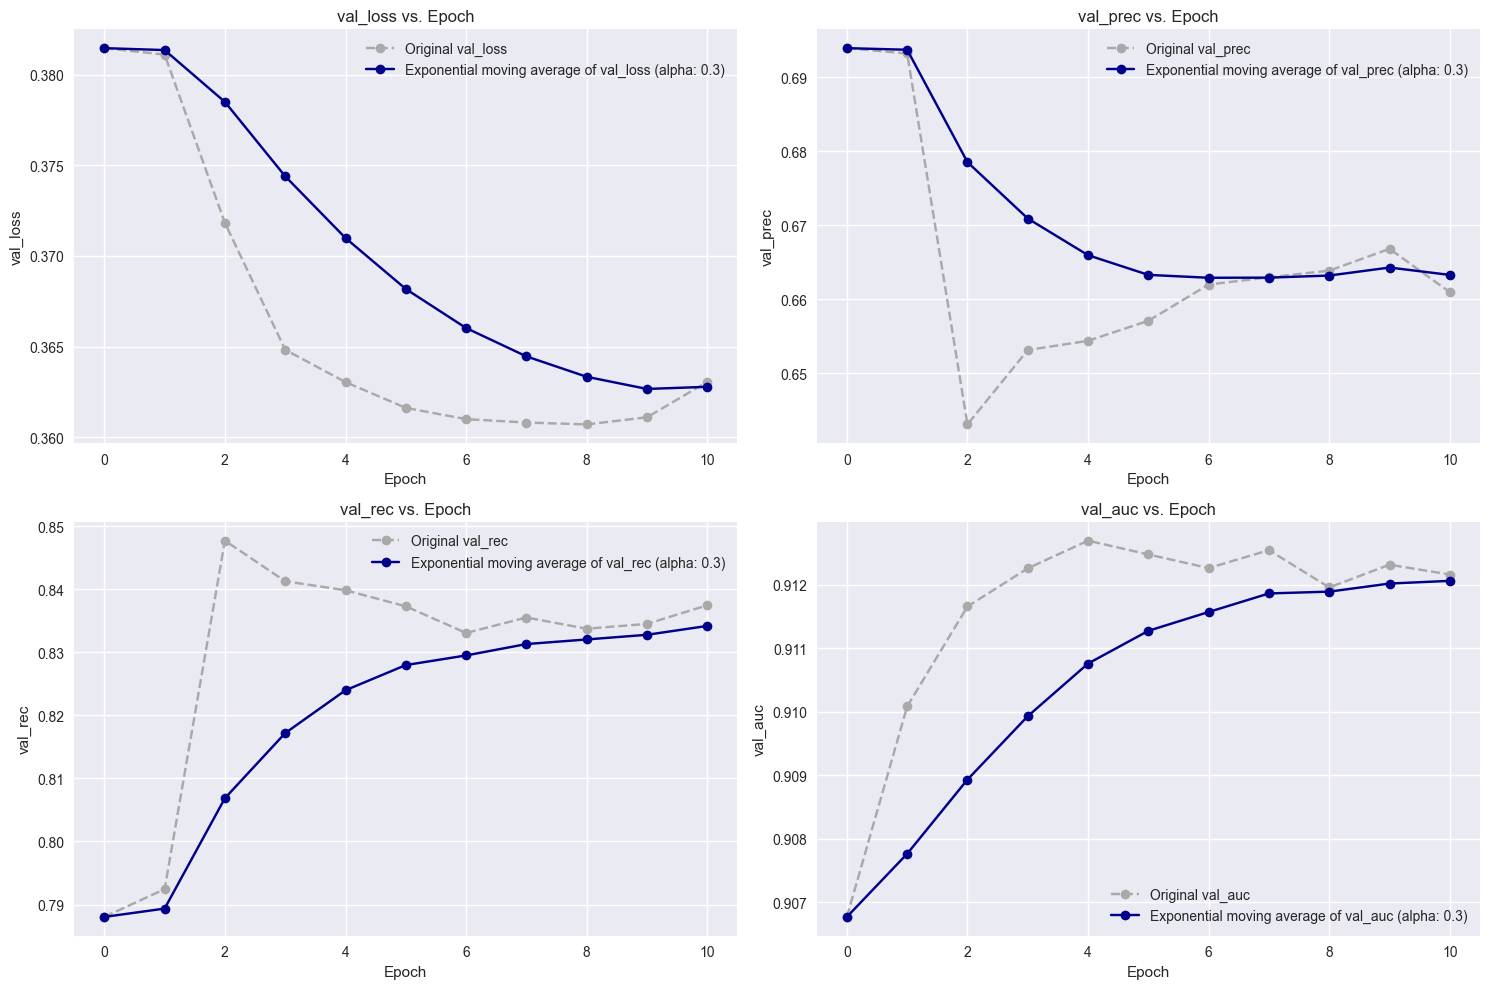

In [10]:
plot_validation_results(resnet_model_history)

In [11]:
evaluation(resnet_model_history)

Observed metric: val_loss 0.381 ------> 0.363
Observed metric: val_prec 0.694 ------> 0.661
Observed metric: val_rec 0.788 ------> 0.837
Observed metric: val_auc 0.907 ------> 0.912


------------------

C:\Users\Egemen\AppData\Local\Temp\ipykernel_31224\573710814.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


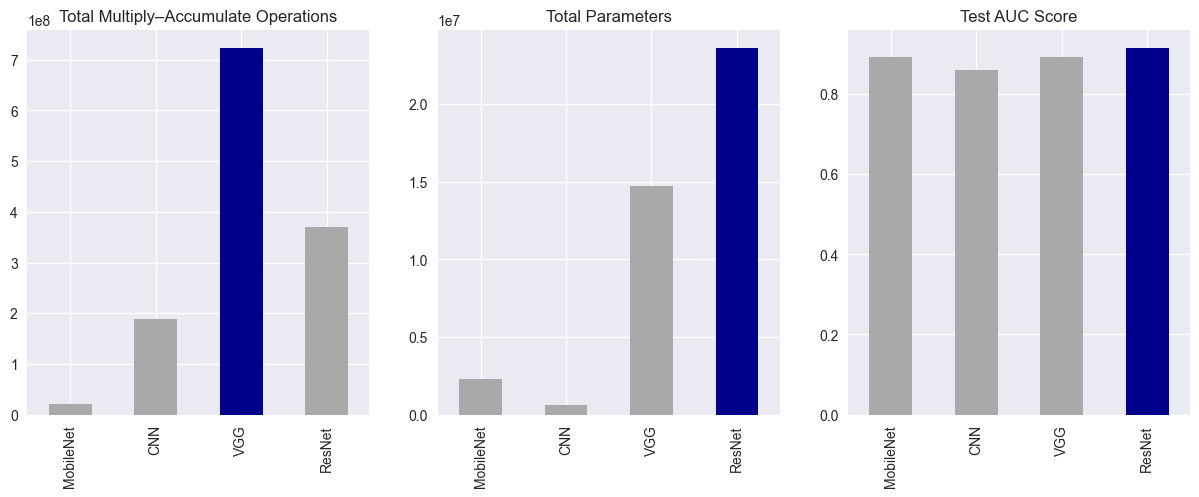

In [12]:
#to highlight the largest
color_selection_mult = ["darkblue" if index == test_results_df["total_multadds"].idxmax() else "darkgrey"for index in test_results_df.index]
color_selection_param = ["darkblue" if index == test_results_df["total_parameters"].idxmax() else "darkgrey"for index in test_results_df.index]
color_selection_f1 = ["darkblue" if index == test_results_df["test_auc"].idxmax() else "darkgrey"for index in test_results_df.index]
color_selection_precision = ["darkblue" if index == test_results_df["test_precision"].idxmax() else "darkgrey"for index in test_results_df.index]
color_selection_recall = ["darkblue" if index == test_results_df["test_recall"].idxmax() else "darkgrey"for index in test_results_df.index]



fig,ax = plt.subplots(figsize = (15,5),ncols = 3, nrows = 1) 
test_results_df["total_multadds"].plot(kind = "bar", title = "Total Multiply–Accumulate Operations", ax = ax[0],color = color_selection_mult)
test_results_df["total_parameters"].plot(kind = "bar", title = "Total Parameters", ax = ax[1],color = color_selection_param)
test_results_df["test_auc"].plot(kind = "bar", title = "Test AUC Score", ax = ax[2],color = color_selection_f1)

fig.show()

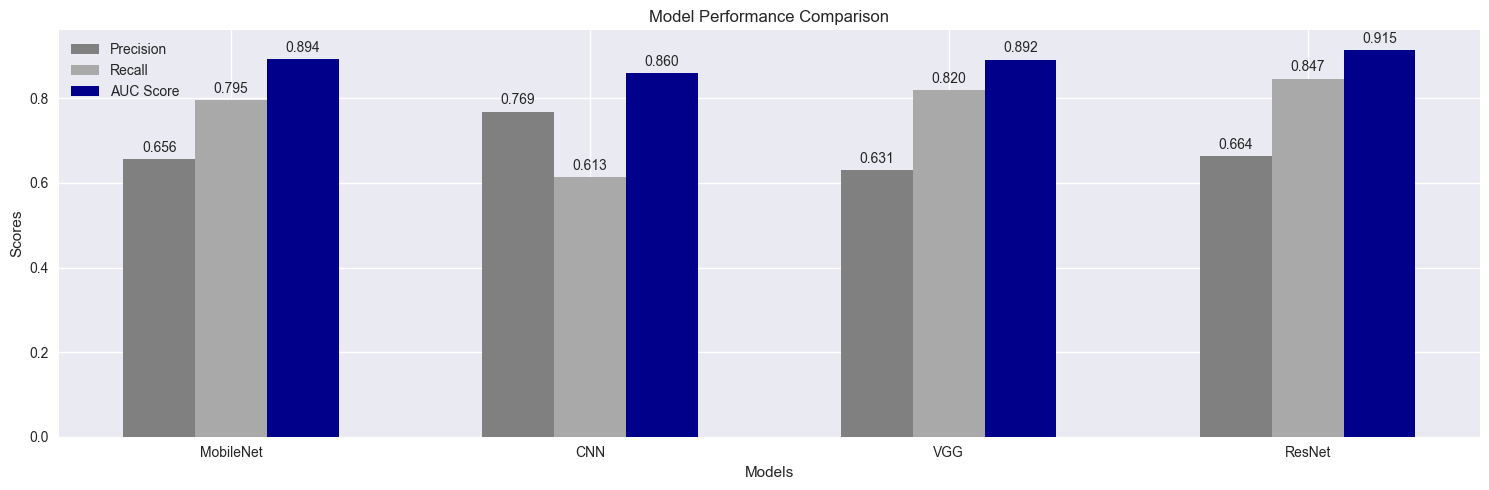

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))

bar_width = 0.2
index = np.arange(len(test_results_df.index))

# Create bar chart
rects1 = ax.bar(index, test_results_df["test_precision"], bar_width, color="grey", label="Precision")
rects2 = ax.bar(index + bar_width, test_results_df["test_recall"], bar_width, color="darkgrey", label="Recall")
rects3 = ax.bar(index + 2 * bar_width, test_results_df["test_auc"], bar_width, color="darkblue", label="AUC Score")

ax.set_xlabel("Models")
ax.set_ylabel("Scores")
ax.set_title("Model Performance Comparison")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(test_results_df.index)
ax.legend()

# Add values above bars
add_labels(ax, rects1)
add_labels(ax, rects2)
add_labels(ax, rects3)


plt.tight_layout()
plt.show()